# 경로 지정 및 데이터 살펴보기
## 경로 지정

- 우선 O, X 이미지들을 읽어 들일 디렉토리 경로를 지정합니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
import os
import PIL
import shutil

# 기본 경로
base_dir = './OX_images/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# 훈련용 O/X 이미지 경로
train_o_dir = os.path.join(train_dir, 'O')
train_x_dir = os.path.join(train_dir, 'X')
print(train_o_dir, train_x_dir)

# 검증용 O/X 이미지 경로
validation_o_dir = os.path.join(validation_dir, 'O')
validation_x_dir = os.path.join(validation_dir, 'X')
print(validation_o_dir, validation_x_dir)

# 테스트용 O/X 이미지 경로
test_o_dir = os.path.join(test_dir, 'O')
test_x_dir = os.path.join(test_dir, 'X')
print(test_o_dir, test_x_dir)

2022-11-25 15:44:39.738314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-25 15:44:39.894275: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-25 15:44:40.424462: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.3/lib64
2022-11-25 15:44:40.424518: W tensorflow/compiler/xla/strea

./OX_images/train/O ./OX_images/train/X
./OX_images/validation/O ./OX_images/validation/X
./OX_images/test/O ./OX_images/test/X


In [2]:
train_o_fnames = os.listdir(train_o_dir)
train_x_fnames = os.listdir(train_x_dir)
print(train_o_fnames)
print(train_x_fnames)

['O2.png', 'O3.png', 'O5.png', 'o_1.png', 'O12.png', 'O11.png', 'O4.png', 'o_10.png', 'o_4.png', 'O10.png', 'O1.png', 'o_8.png', 'O6.png', 'O7.png', 'o_3.png', 'o_7.png', 'O13.png', 'O8.png', 'O9.png']
['X3.png', 'X10.png', 'X8.png', 'x_7.png', 'x_10.png', 'x_6.png', 'X6.png', 'x_5.png', 'x_8.png', 'X11.png', 'X7.png', 'X4.png', 'X9.png', 'X1.png', 'X5.png', 'X12.png', 'x_9.png', 'X2.png', 'X13.png']


In [3]:
print('Total training o images :', len(os.listdir(train_o_dir)))
print('Total training x images :', len(os.listdir(train_x_dir)))

print('Total validation o images :', len(os.listdir(validation_o_dir)))
print('Total validation x images :', len(os.listdir(validation_x_dir)))

print('Total test o images :', len(os.listdir(test_o_dir)))
print('Total test x images :', len(os.listdir(test_x_dir)))

Total training o images : 19
Total training x images : 19
Total validation o images : 10
Total validation x images : 10
Total test o images : 4
Total test x images : 4


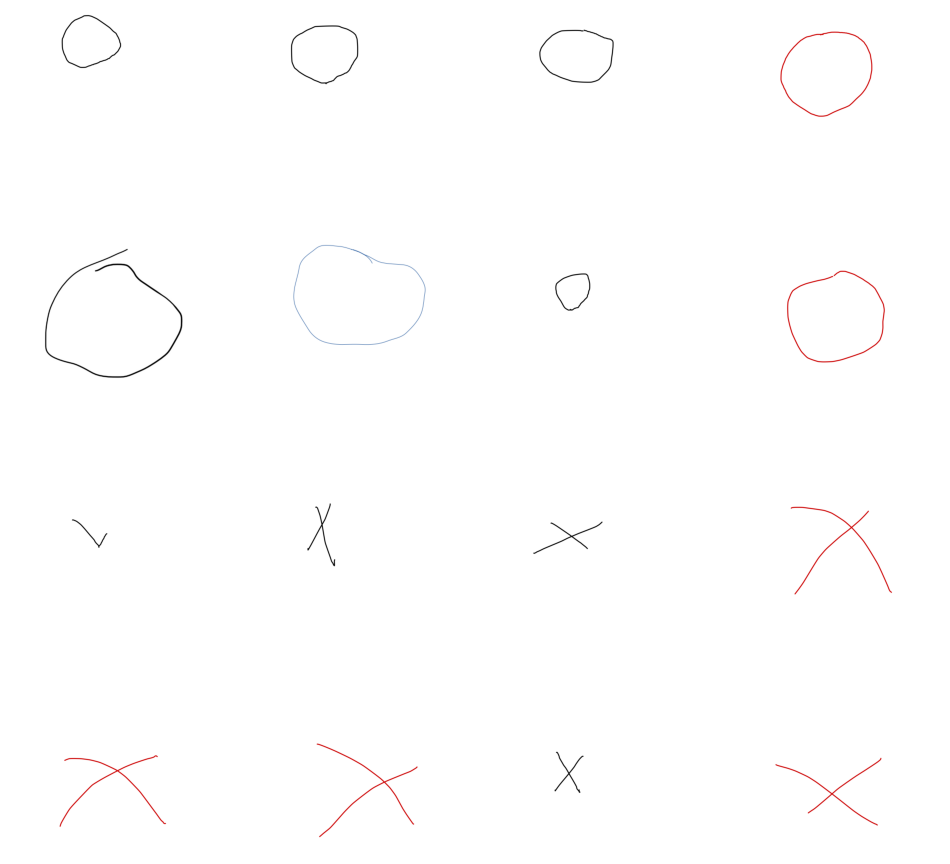

In [4]:
# 이미지 확인
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_o_pix = [os.path.join(train_o_dir, fname) for fname in train_o_fnames[pic_index-8:pic_index]]
next_x_pix = [os.path.join(train_x_dir, fname) for fname in train_x_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_o_pix+next_x_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('OFF')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [17]:
# 이미지 데이터 전처리
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmentation
# train셋에만 적용
train_datagen = ImageDataGenerator(rescale = 1/255., # 모든 이미지 원소값들을 255로 나누기
                                   rotation_range=25, # 0~25도 사이에서 임의의 각도로 원본이미지를 회전
                                   width_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 좌우 이동
                                   height_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 상하 이동
                                   zoom_range=0.2, # (1-0.2)~(1+0.2) => 0.8~1.2 사이에서 임의의 수치만큼 확대/축소
                                   horizontal_flip=True, # 좌우로 뒤집기                                   
                                   vertical_flip=True,
                                   fill_mode='nearest'
                                  ) 
# validation 및 test 이미지는 augmentation을 적용하지 않는다;
# 모델 성능을 평가할 때에는 이미지 원본을 사용 (rescale만 진행)
validation_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.) 

In [31]:
# flow_from_directory() 메서드를 이용해서 훈련과 테스트에 사용될 이미지 데이터를 만들기
# 변환된 이미지 데이터 생성
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=4, # 한번에 변환된 이미지 16개씩 만들어라 라는 것
                                                    color_mode='grayscale', # 흑백 이미지 처리
                                                    class_mode='binary', 
                                                    target_size=(128,128)) # target_size에 맞춰서 이미지의 크기가 조절된다
validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                              batch_size=4, 
                                                              color_mode='grayscale',
                                                              class_mode='binary', 
                                                              target_size=(128,128))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=4,
                                                  color_mode='grayscale',
                                                  class_mode='binary',
                                                  target_size=(128,128))
# 참고로, generator 생성시 batch_size x steps_per_epoch (model fit에서) <= 훈련 샘플 수 보다 작거나 같아야 한다.

Found 38 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [32]:
# class 확인
train_generator.class_indices


{'O': 0, 'X': 1}

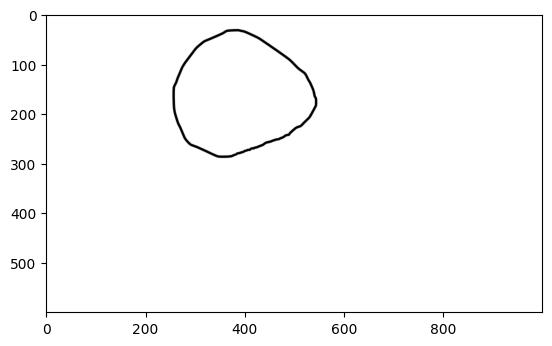

In [33]:
# 이미지 하나 불러오기
sample_img = mpimg.imread(next_o_pix[0])
plt.imshow(sample_img)
plt.show()

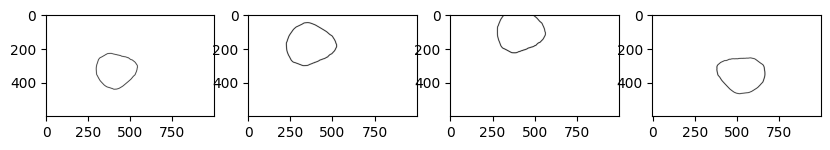

In [34]:
max_iter = 4
cnt = 1
sample_img2 = sample_img[np.newaxis, ...]
# 축을 하나 추가했는데, 하나의 이미지만 바꿔주는게 아니라 동시에 여러개의 이미지를 바꿔줄 수 있기에,
# 그림 개수/장수 까지 받아서 4차원으로 (개수/장수, h, w, channel) 이렇게 받는다
# 쉽게 말해, 받는 형식이 4차원이라서 4차원 형태로 만들어 준것

plt.figure(figsize=(10,10))
for img in train_datagen.flow(sample_img2):
    plt.subplot(1, max_iter, cnt)
    plt.imshow(image.array_to_img(img[0]))
    if cnt == max_iter:
        break
    cnt += 1

In [35]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary() # 신경망의 구조 확인

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 16)      160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 32)      

In [36]:
from tensorflow.keras.optimizers import RMSprop

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model.compile(optimizer=RMSprop(learning_rate=0.001), # 옵티마이저로는 RMSprop 사용
              loss='binary_crossentropy', # 손실 함수로 ‘binary_crossentropy’ 사용
              metrics= ['accuracy'])
# RMSprop (Root Mean Square Propagation) Algorithm: 훈련 과정 중에 학습률을 적절하게 변화시킨다.

In [37]:
# 모델 훈련
history = model.fit(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_generator, # validatino_generator안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 4번 부르겠다
                              epochs=100, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_generator를 4번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)
# 참고: validation_steps는 보통 내가 원하는 이미지 수에 flow할 때 지정한 batchsize로 나눈 값을 validation_steps로 지정

Epoch 1/100
4/4 - 2s - loss: 1.1450 - accuracy: 0.3750 - val_loss: 0.6927 - val_accuracy: 0.5000 - 2s/epoch - 542ms/step
Epoch 2/100
4/4 - 0s - loss: 0.7278 - accuracy: 0.5714 - val_loss: 0.6911 - val_accuracy: 0.5000 - 446ms/epoch - 111ms/step
Epoch 3/100
4/4 - 0s - loss: 0.6988 - accuracy: 0.4286 - val_loss: 0.6934 - val_accuracy: 0.5000 - 322ms/epoch - 81ms/step
Epoch 4/100
4/4 - 0s - loss: 0.7739 - accuracy: 0.5625 - val_loss: 0.7057 - val_accuracy: 0.3750 - 363ms/epoch - 91ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6965 - accuracy: 0.5000 - val_loss: 0.7022 - val_accuracy: 0.5000 - 364ms/epoch - 91ms/step
Epoch 6/100
4/4 - 0s - loss: 0.7182 - accuracy: 0.4375 - val_loss: 0.6651 - val_accuracy: 0.6250 - 376ms/epoch - 94ms/step
Epoch 7/100
4/4 - 0s - loss: 0.6947 - accuracy: 0.5000 - val_loss: 0.6891 - val_accuracy: 0.5000 - 328ms/epoch - 82ms/step
Epoch 8/100
4/4 - 0s - loss: 0.6968 - accuracy: 0.3571 - val_loss: 0.6926 - val_accuracy: 0.5000 - 308ms/epoch - 77ms/step
Epoch 9/100
4/4 -

In [38]:
model.evaluate(train_generator)

10/10 [==============================] - 0s 25ms/step - loss: 0.1904 - accuracy: 0.9211


[0.1903950423002243, 0.9210526347160339]

In [39]:
model.evaluate(validation_generator)

5/5 [==============================] - 0s 29ms/step - loss: 0.2332 - accuracy: 0.9000


[0.23321835696697235, 0.8999999761581421]